## **구간 분할**

In [1]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

print(X.shape)
print(y.shape)

(100, 1)
(100,)


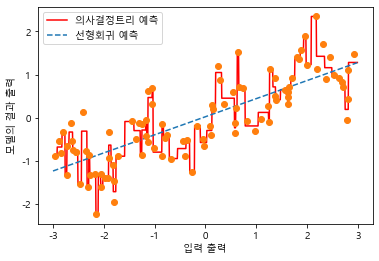

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# 모델을 선택 및 학습 
linear = LinearRegression().fit(X, y)
decision = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

# 실선으로 -3~3까지의 값을 데이터로 넣어 의사 결정트리 모델 예측
plt.plot(line, decision.predict(line), 'r-', label='의사결정트리 예측')

# 점선으로 -3~3까지의 값을 데이터로 넣어 회귀 모델 예측
plt.plot(line, linear.predict(line), '--', label='선형회귀 예측')

# 모델을 만들었던 데이터 찍겠다.
plt.plot(X[:, 0], y, 'o')

plt.ylabel("모델의 결과 출력")
plt.xlabel("입력 출력")
plt.legend(loc="best")

In [5]:
bins = np.linspace(-3,3,11)
print("구간: {}".format(bins))

구간: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [6]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy="uniform")
kb.fit(X)
print("bin edges : \n", kb.bin_edges_ )

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [7]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [8]:
print(X[:10])  # 10개 데이터
X_binned[0:10].toarray()

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [9]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode='onehot-dense') # {'onehot','onehot-dense', 'ordinal'}
kb.fit(X)
X_binned = kb.transform(X)
X_binned[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [10]:
print(X[:10])  # 10개 데이터
X_binned[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [11]:
print(X.shape, X_binned.shape)

(100, 1) (100, 10)


In [12]:
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)
line[0:10]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946]])

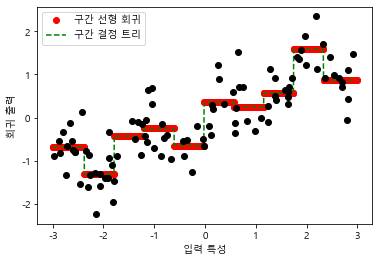

In [13]:
from sklearn.tree import DecisionTreeRegressor

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'ro', label="구간 선형 회귀")   # 점

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'g--', label="구간 결정 트리")  # 점선

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [14]:
print(X.shape)
print(X_binned.shape)

(100, 1)
(100, 10)


In [15]:
np.min(line), np.max(line), line.shape

(-3.0, 2.9939999999999998, (1000, 1))

In [16]:
X.shape, X_binned.shape

((100, 1), (100, 10))

In [17]:
# 원본 데이터와 구간화된 데이터 결합
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
X_combined[0:3]

(100, 11)


array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ]])

In [18]:
line.shape, line_binned.shape

((1000, 1), (1000, 10))

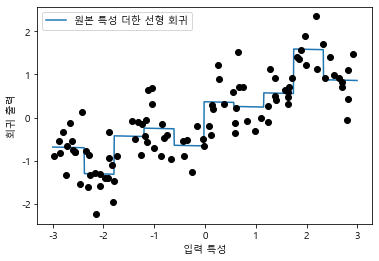

In [19]:
# 회귀 모델
reg = LinearRegression().fit(X_combined, y)

# line_binned = kb.transform(line)
line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label="원본 특성 더한 선형 회귀")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc="best")

(100, 20)
(1000, 1)
(1000, 10)


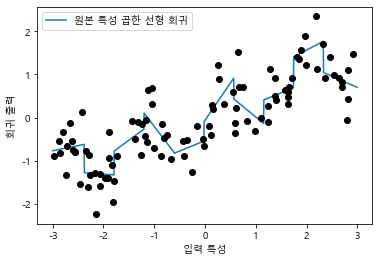

In [20]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

# 회귀 모델
reg = LinearRegression().fit(X_product, y)

# line_binned = kb.transform(line)
line_product = np.hstack([line_binned, line * line_binned])

print(line.shape)
print(line_binned.shape)


plt.plot(line, reg.predict(line_product), label="원본 특성 곱한 선형 회귀")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.plot(X[:, 0], y, 'o', c='k')

## **비선형 변환**

In [21]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [22]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [23]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))  # 정규분포를 따르는 임의의 행렬 1000,3 만들기

# np.random.normal()  # 정규분포를 따르는 임의의 값을 가져오겠다.
# np.random.uniform()  # 균등 분포를 따르는 임의의 값을 가져오겠다.
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)

(1000, 3)
(3,)


In [24]:
# 포아송 분포를 따르는 값 
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("X, w : ", X.shape, w.shape)
print("y : ", y.shape)
print(X[:, 0])

X, w :  (1000, 3) (3,)
y :  (1000,)
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33   9   6  30   7
  25  27  40  15   2   5   7   3   5  42  10   7  87   5  19   4  24   8
  10  11   2   9   2   7   1   0   4   8  32   2  11  16   2   5   1   8
  13  19  13  68   2  21  20  12  10  16   5   7   1   3   1   9  10   3
   4 112  26   3   3  45   7  11  18   2   4   3  11  13  10   2  28  10
   8  14  14   3  23   3  24  28  18  17  13  27  56  10  23  11  24   5
  34  13  28   0  32   5   1  12   6  14   8  84   1   5  45   1  22   9
  47  14  29   9   2   9  10   1  25   2  17  60   0   6   0  12   0  10
  11  51  31   3  22  36   2  14   4  19  16  24   8  27   2   5   6  17
  11   6   1   9  15   5  25  15  21   8   8  53   6   4   4  38  28   5
   6   1  12   4   5  17   5  21   3  16  53  34   9   1  15   2   8  29
   1  84  36  2

In [25]:
### 각 값이 가지는 것에 대해 확인해 보기
print("값 출현 횟수(0~) :\n",np.bincount(X[:,0]))

값 출현 횟수(0~) :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

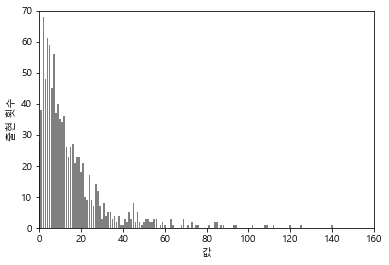

In [26]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

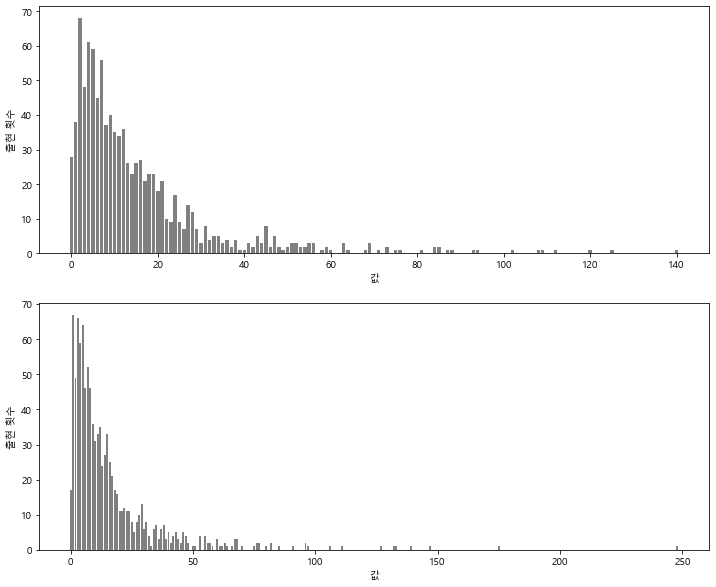

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X.shape, y.shape

((1000, 3), (1000,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

(750, 3) (250, 3) (750,) (250,)
테스트 점수 : 0.622


Text(0.5, 0, '값(log적용)')

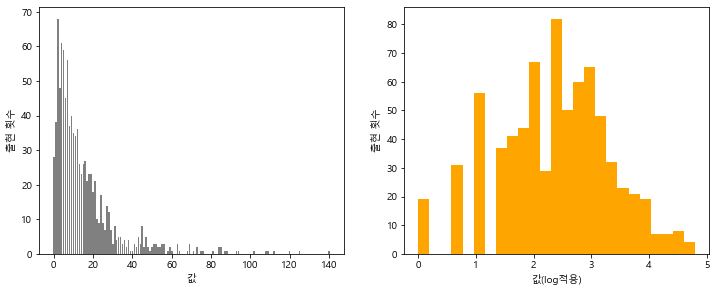

In [30]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)


plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [31]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


## **특성자동 선택(1)**

In [32]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [33]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [34]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [35]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [36]:
## 학습 세트에 적용
X_train_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_train_selected.shape)

X_train.shape: (284, 70)
X_train_selected.shape (284, 35)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


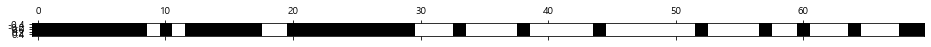

In [37]:
import matplotlib.pyplot as plt
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [38]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성 사용 : 0.940
선택된 일부 특성 사용 : 0.923


In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                               random_state=42),
                                               threshold="median")

In [40]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (284, 70)
X_train_l1.shape : (284, 35)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False  True False False False  True False False
 False False False False  True False  True False False False False False
  True False False  True  True False False False  True False]


Text(0.5, 0, '특성 번호')

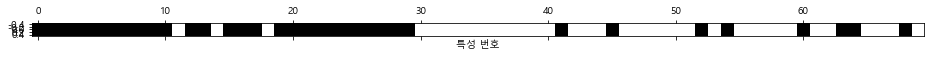

In [41]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [42]:
# 테스트 데이터 변환 
X_test_l1 = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

# score = LogisticRegression().fit(X_train, y_train).score(X_test_l1, y_test)

전체 특성 사용 : 0.940


Text(0.5, 0, '특성 번호')

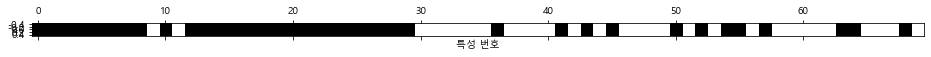

In [43]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

In [44]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.930


In [45]:
### RFE에서 사용된 모델로 예측
print("테스트 점수 : {:.3f}".format(select.score(X_test, y_test)))

테스트 점수 : 0.933


## **특성자동 선택(2)**

In [46]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')


from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression, f_classif

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression


boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
# 입력 데이터와 출력데이터를 지정해준다.
X = df_boston.loc[ : , 'CRIM':'LSTAT']
y = boston.target
print("정규화, 확장 전 데이터 셋 : ", X.shape, y.shape)

## 값을 전체적으로 0~1로 사이로 만들기 
nor_X = MinMaxScaler().fit_transform(X)
nor_X.min(), nor_X.max()

정규화, 확장 전 데이터 셋 :  (506, 13) (506,)


(0.0, 1.0)

In [48]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)
print( ex_X.shape, type(ex_X) )

(506, 104) <class 'numpy.ndarray'>


In [49]:
X = ex_X          # 입력
y = boston.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_regression, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function f_regression at 0x000001EFE51B8B80>)

In [50]:
## 학습 세트에 적용
X_tr_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_tr_selected.shape)

X_train.shape: (253, 104)
X_train_selected.shape (253, 52)


[ True  True  True False  True  True False False False  True  True False
  True False False  True False  True False  True  True False  True  True
 False  True False False False  True  True  True False False False False
  True False  True False  True False  True False  True  True  True False
  True False False False False False False False False False False  True
 False  True False  True  True  True False  True  True False  True False
 False False  True  True  True False  True  True  True False  True False
 False False False False False  True  True  True False  True  True  True
 False  True  True False  True False  True  True]


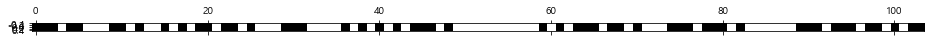

In [51]:
import matplotlib.pyplot as plt

### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

전체 특성 사용 : 0.664


In [53]:
# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr1 = LinearRegression()
lr1.fit(X_tr_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr1.score(X_test_selected, y_test)))

선택된 일부 특성 사용 : 0.758


In [54]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


select = SelectFromModel(RandomForestRegressor(n_estimators=100, 
                                               random_state=42),
                                               threshold="median")  # 1.25*mean, 0.75*mean 

In [55]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (253, 104)
X_train_l1.shape : (253, 52)


[False False False False False  True False False False False False  True
  True False  True  True False  True  True  True False False  True  True
 False  True False  True False False False False False False False False
 False False False False  True False  True  True  True False  True  True
  True False False False False False False False False False False False
 False False  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True False False  True  True  True False  True
  True  True False  True  True False  True  True]


Text(0.5, 0, '특성 번호')

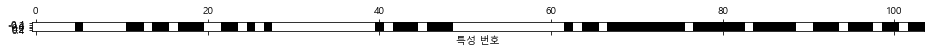

In [56]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [57]:
# 학습용, 테스트 데이터 변환 
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

lr1 = LinearRegression()
lr1.fit(X_train_l1, y_train)
print("전체 특성 사용 : {:.3f}".format(lr1.score(X_test_l1, y_test)))

전체 특성 사용 : 0.770


In [58]:
from sklearn.feature_selection import RFE

%%time

# RFE 반복적인 변수의 제거를 통해 좋은 피처만 남긴다.
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
            n_features_to_select=52)

select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

UsageError: Line magic function `%%time` not found.


In [59]:
X_tr_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LinearRegression().fit(X_tr_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.770


In [60]:
### RFE에서 사용된 모델로 예측
model = LinearRegression().fit(X_tr_rfe, y_train)
print("최종 모델 테스트 점수 : {:.3f}".format(model.score(X_test_rfe, y_test)))

최종 모델 테스트 점수 : 0.770
